# Development examples

In [1]:
import numpy as np
import uproot
import matplotlib.pyplot as plt
import heputils

heputils.plot.set_style("ATLAS")
heputils.plot.set_experiment_info(status="Internal")  # Internal, Preliminary, Public
heputils.plot.set_experiment_info(
    center_of_mass_energy=13, center_of_mass_energy_units="TeV"
)  # Default values
heputils.plot.set_experiment_info(
    luminosity=132, luminosity_units="fb"
)  # Default values

In [2]:
root_file = uproot.open("example.root")
root_hists = [root_file[key].to_hist() for key in root_file.keys()]
data_hist = root_hists[-1]
simulation_hists = root_hists[:-1]

In [3]:
labels = [r"$t\bar{t}$", r"$W+$jets", "Other", "Signal"]
colormap = ["darkorange", "steelblue", "firebrick", "purple"]

scale_factors = np.ones(len(simulation_hists))
scale_factors[-1] = 5

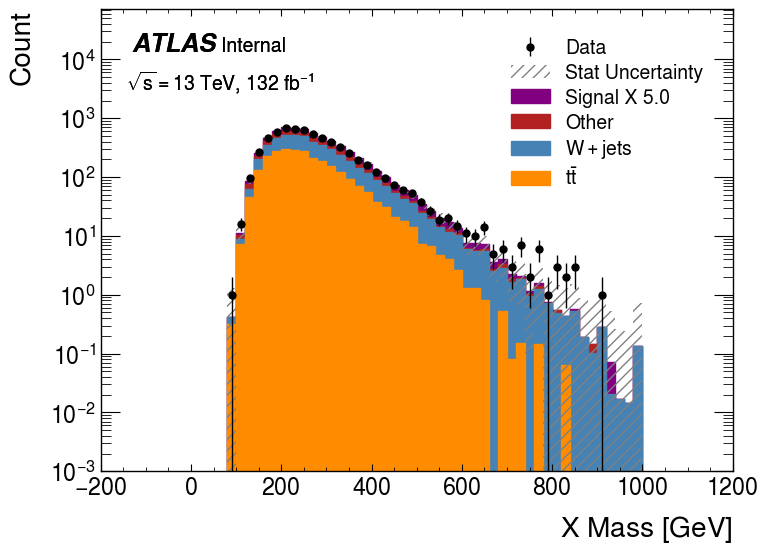

In [4]:
ax = heputils.plot.stack_hist(
    simulation_hists,
    labels=labels,
    color=colormap,
    xlabel=r"$X$ Mass [GeV]",
    ylabel="Count",
    scale_factors=scale_factors,
)
ax = heputils.plot.data_hist(data_hist, ax=ax);

In [5]:
fig = ax.get_figure()
print(f"width: {fig.get_figwidth()}, height: {fig.get_figheight()}")

width: 8.0, height: 6.0


<AxesSubplot:xlabel='$X$ Mass [GeV]', ylabel='Data/Sim'>

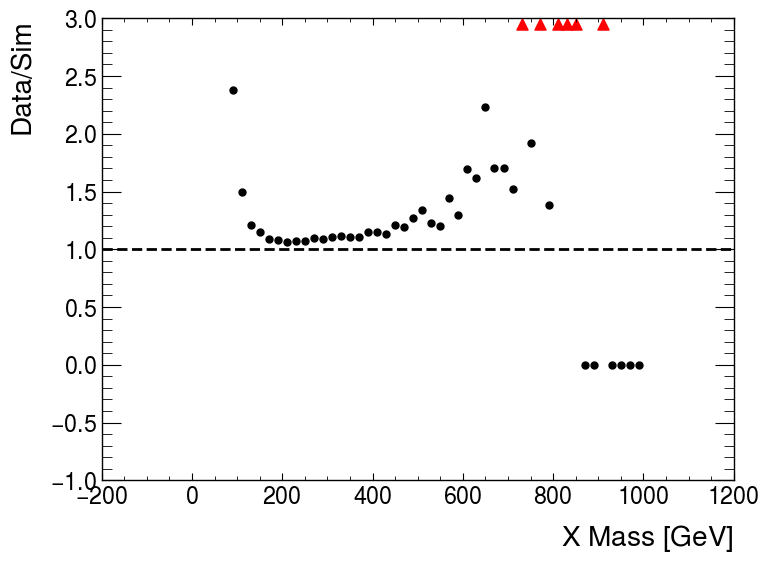

In [6]:
_xlim = ax.get_xlim()
fig, ax = plt.subplots()
ax.set_xlim(_xlim)
heputils.plot.ratio_plot(
    data_hist, heputils.utils.sum_hists(simulation_hists), ax=ax, y_range=2
)

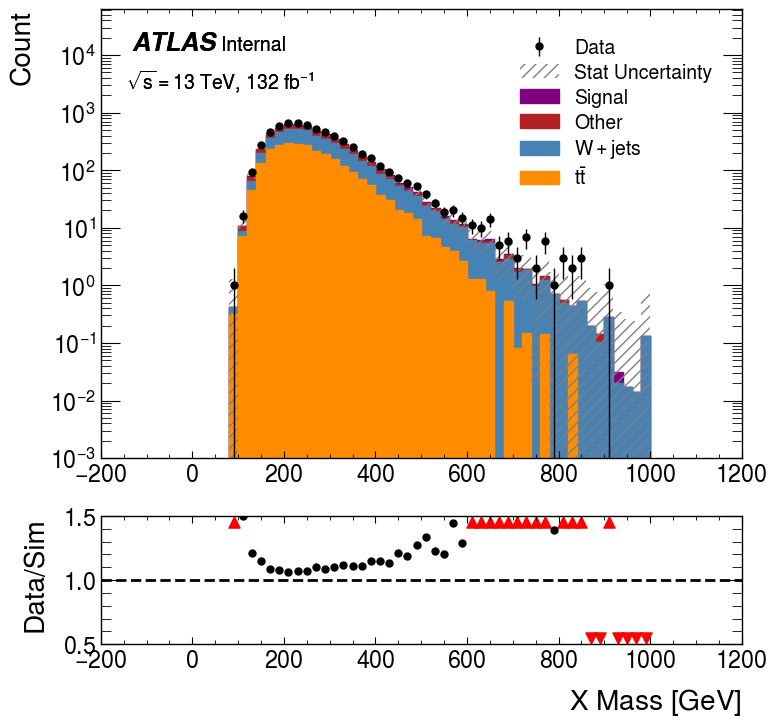

In [18]:
axs = heputils.plot.stack_ratio_plot(
    simulation_hists, data_hist=data_hist, labels=labels, color=colormap
)

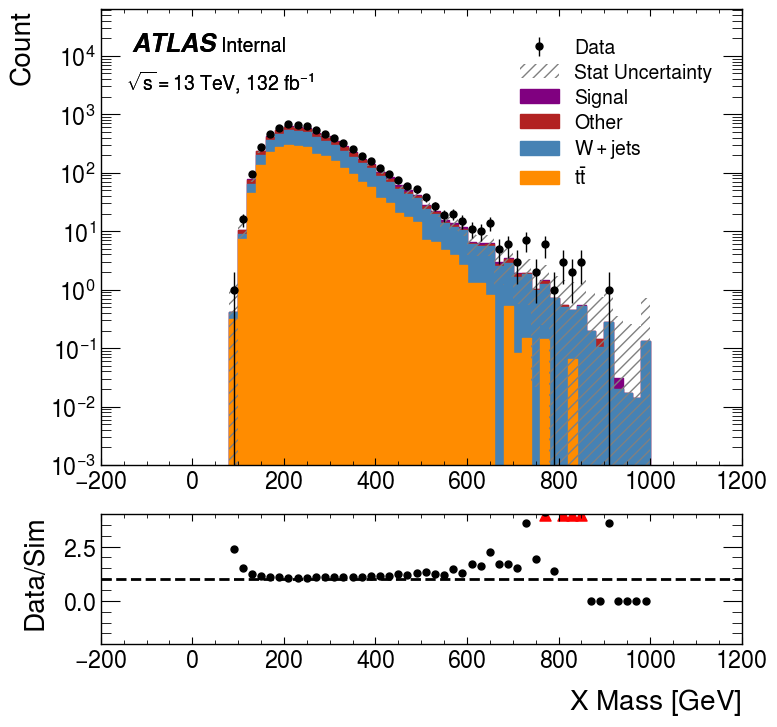

In [8]:
axs = heputils.plot.stack_ratio_plot(
    simulation_hists, data_hist=data_hist, labels=labels, color=colormap, y_range=3
)

In [9]:
fig = axs[0].get_figure()
print(f"width: {fig.get_figwidth()}, height: {fig.get_figheight()}")

width: 8.0, height: 7.5


In [19]:
axs[0].figure.savefig("example_stack.png")

Can also give the data histogram directly to `heputils.plot.stack_hist`

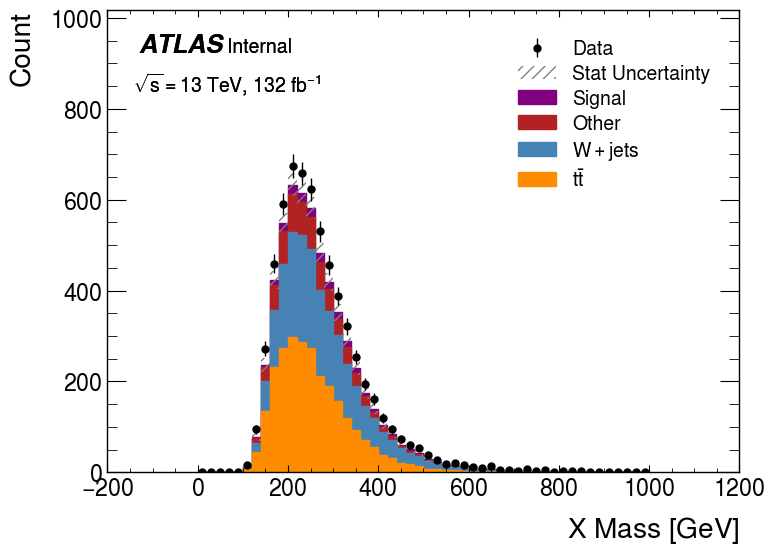

In [11]:
ax, artists = heputils.plot.stack_hist(
    simulation_hists,
    labels=labels,
    color=colormap,
    xlabel=r"$X$ Mass [GeV]",
    ylabel="Count",
    data_hist=data_hist,
    logy=False,
    return_artists=True,
)

Can easily plot on a `subplots` grid

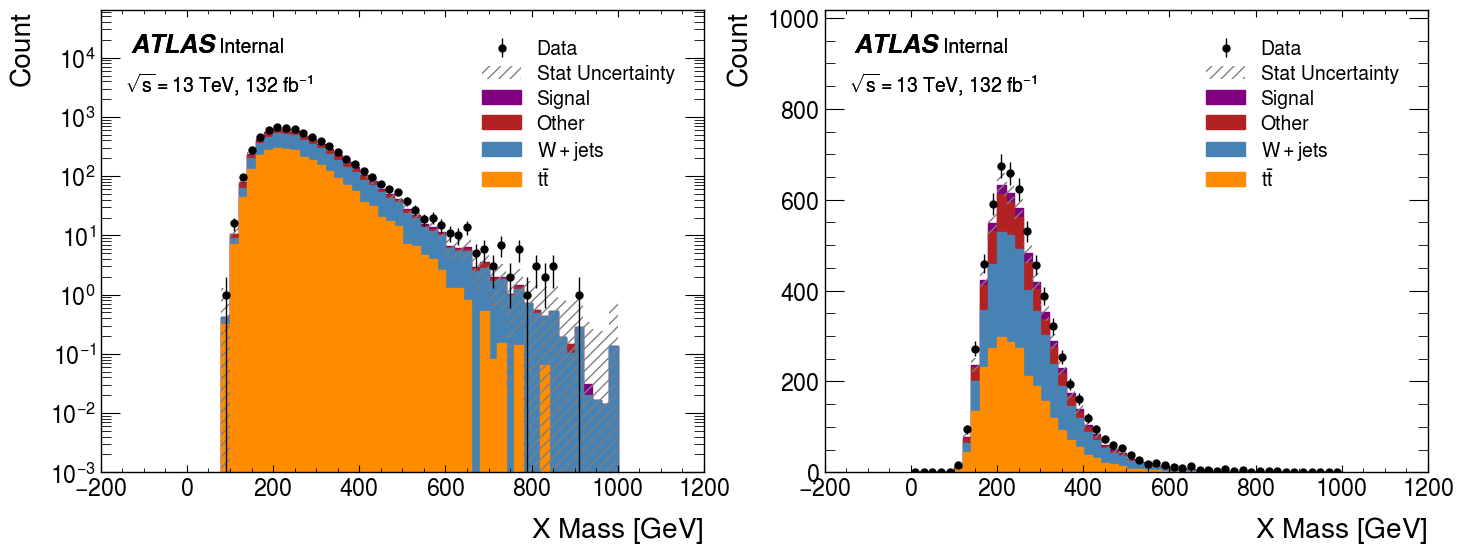

In [12]:
_fig_size = heputils.plot.get_style()["figure.figsize"]
fig, axs = plt.subplots(1, 2, figsize=(2.1 * _fig_size[0], _fig_size[1]))

axs[0] = heputils.plot.stack_hist(
    simulation_hists,
    labels=labels,
    color=colormap,
    xlabel=r"$X$ Mass [GeV]",
    ylabel="Count",
    data_hist=data_hist,
    ax=axs[0],
)
axs[1] = heputils.plot.stack_hist(
    simulation_hists,
    labels=labels,
    color=colormap,
    xlabel=r"$X$ Mass [GeV]",
    ylabel="Count",
    data_hist=data_hist,
    logy=False,
    ax=axs[1],
)

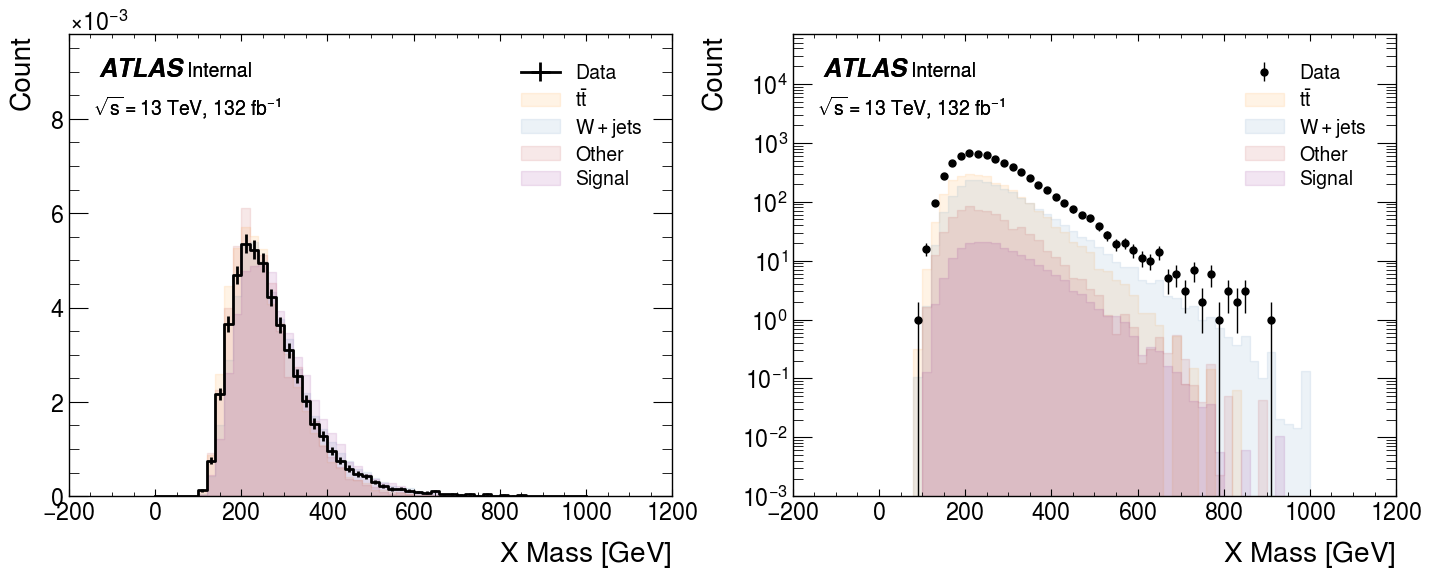

In [13]:
_fig_size = heputils.plot.get_style()["figure.figsize"]
fig, axs = plt.subplots(1, 2, figsize=(2.1 * _fig_size[0], _fig_size[1]))

axs[0] = heputils.plot.shape_hist(
    simulation_hists,
    data_hist=data_hist,
    labels=labels,
    color=colormap,
    xlabel=r"$X$ Mass [GeV]",
    ylabel="Count",
    ax=axs[0],
)
axs[1] = heputils.plot.shape_hist(
    simulation_hists,
    data_hist=data_hist,
    labels=labels,
    color=colormap,
    xlabel=r"$X$ Mass [GeV]",
    ylabel="Count",
    logy=True,
    density=False,
    ax=axs[1],
)

For a shape plot you can also easily switch between a `fill` style (shaded) and a `step` style (lines) using the `histtype` kwarg

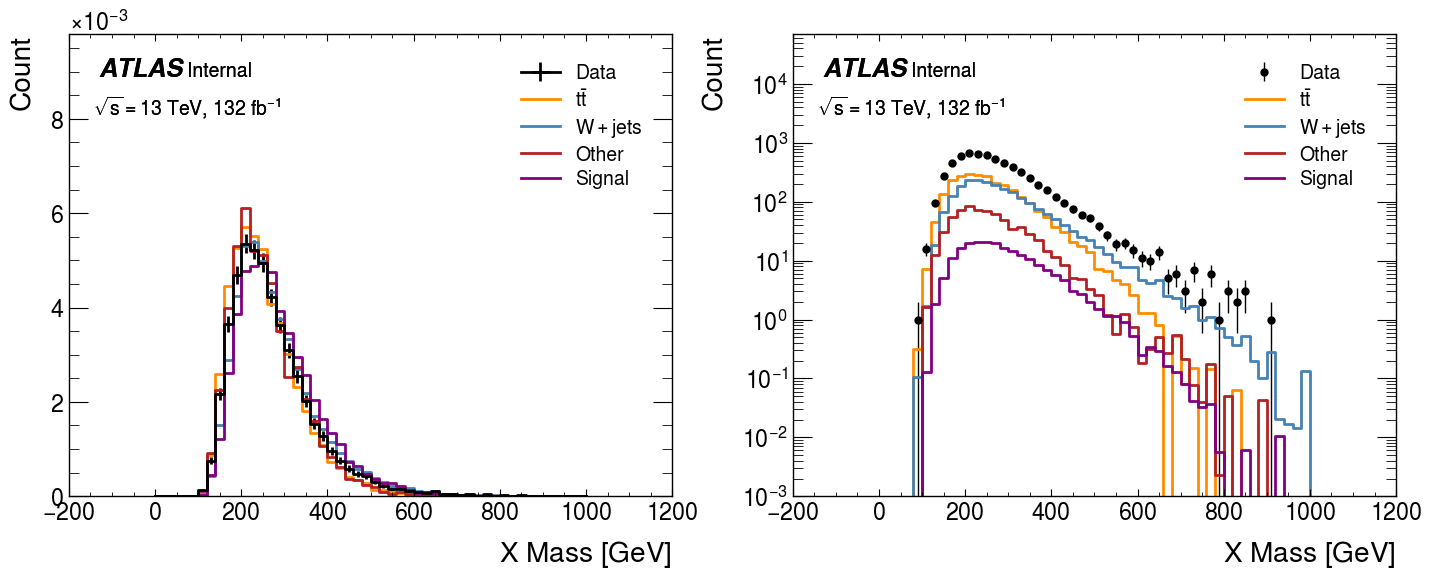

In [14]:
_fig_size = heputils.plot.get_style()["figure.figsize"]
fig, axs = plt.subplots(1, 2, figsize=(2.1 * _fig_size[0], _fig_size[1]))

axs[0] = heputils.plot.shape_hist(
    simulation_hists,
    data_hist=data_hist,
    labels=labels,
    color=colormap,
    histtype="step",
    xlabel=r"$X$ Mass [GeV]",
    ylabel="Count",
    ax=axs[0],
)
axs[1] = heputils.plot.shape_hist(
    simulation_hists,
    data_hist=data_hist,
    labels=labels,
    color=colormap,
    histtype="step",
    xlabel=r"$X$ Mass [GeV]",
    ylabel="Count",
    logy=True,
    density=False,
    ax=axs[1],
)

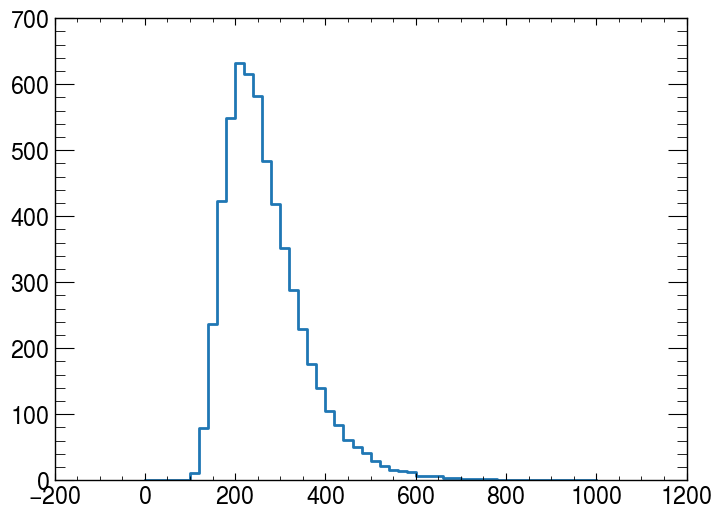

In [15]:
stacked_hist = heputils.utils.sum_hists(simulation_hists)
stacked_hist.plot();

In [16]:
stacked_hist

Hist(Regular(50, 0, 1000, label='Axis 0'), storage=Double()) # Sum: 5680.492882434512